<a href="https://colab.research.google.com/github/SimenKlemp/Tensorflow/blob/main/hw8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem 1**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Creating input and output data**

(1, 20)
(1, 20)


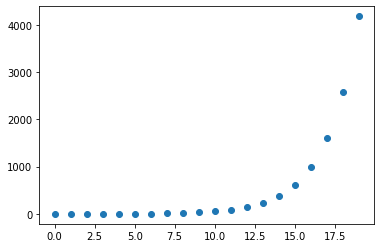

In [2]:
def Fibonacci(n):
  if n < 0:
    print("Incorrect input")
  # First Fibonacci number is 0
  elif n == 1:
    return 0
  # Second Fibonacci number is 1
  elif n == 2:
    return 1
  else:
    return Fibonacci(n-1)+Fibonacci(n-2)

x = np.array([np.arange(0, 20)])
y = np.array([[Fibonacci(i+1) for i in range(20)]])

print(y.shape)
print(x.shape)

plt.scatter(x, y)


**Building model**

In [3]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


model = Sequential()
model.add(Dense(3, input_dim = y.shape[1], activation='relu'))
model.add(Dense(y.shape[1]))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 63        
                                                                 
 dense_1 (Dense)             (None, 20)                80        
                                                                 
Total params: 143
Trainable params: 143
Non-trainable params: 0
_________________________________________________________________


**Training the model**

In [4]:
model.fit(y,y, verbose=1, epochs=2000)
pred = model.predict(y)

Epoch 1/2000
1/1 [==============================] - 1s 1s/step - loss: 1798286.7500
Epoch 2/2000
1/1 [==============================] - 0s 12ms/step - loss: 1788247.6250
Epoch 3/2000
1/1 [==============================] - 0s 15ms/step - loss: 1778317.6250
Epoch 4/2000
1/1 [==============================] - 0s 9ms/step - loss: 1768498.2500
Epoch 5/2000
1/1 [==============================] - 0s 8ms/step - loss: 1758790.6250
Epoch 6/2000
1/1 [==============================] - 0s 20ms/step - loss: 1749196.2500
Epoch 7/2000
1/1 [==============================] - 0s 74ms/step - loss: 1739715.0000
Epoch 8/2000
1/1 [==============================] - 0s 13ms/step - loss: 1730348.7500
Epoch 9/2000
1/1 [==============================] - 0s 18ms/step - loss: 1721097.6250
Epoch 10/2000
1/1 [==============================] - 0s 28ms/step - loss: 1711962.0000
Epoch 11/2000
1/1 [==============================] - 0s 12ms/step - loss: 1702943.2500
Epoch 12/2000
1/1 [==============================] - 0s 

**Inpu/output function**

In [5]:
from sklearn import metrics

score = np.sqrt(metrics.mean_squared_error(pred, y))

##np.set_printoptions(suppress=True)

print("Score(RMSE): {}".format(score))

Score(RMSE): 0.0021673206487624443


# **Problem 2**

In [6]:
from matplotlib.pyplot import imshow
from PIL import Image


In [7]:
from google.colab import files
uploaded = files.upload()

Saving cat.jpg to cat.jpg


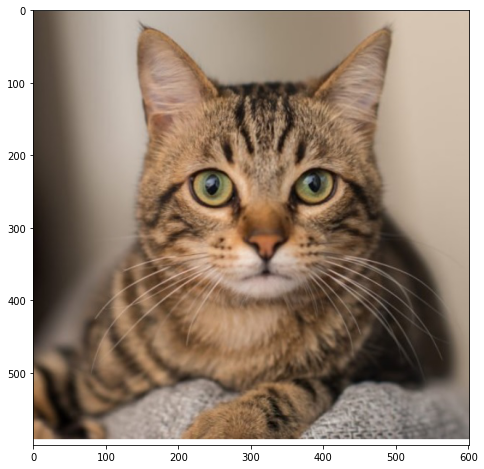

In [8]:
img = Image.open("cat.jpg")

fig,aux = plt.subplots(figsize = (8,8))
aux.imshow(img, cmap='gray')

**Resize input image**

In [9]:
img.load()
img = img.resize((128,128), Image.ANTIALIAS)

img_array = np.asarray(img)
img_array = img_array.flatten()
img_array = np.array([img_array])
img_array = img_array.astype(np.float32)


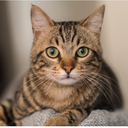

In [10]:
cols,rows = img.size

img_array2 = img_array.reshape(rows, cols, 3)
img_array2 = img_array2.astype(np.uint8)
img2 = Image.fromarray(img_array2, 'RGB')

img2



**Building the NN**

In [27]:
model = Sequential()
model.add(Dense(2, input_dim=img_array.shape[1], activation='relu'))
model.add(Dense(img_array.shape[1]))
model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 2)                 98306     
                                                                 
 dense_7 (Dense)             (None, 49152)             147456    
                                                                 
Total params: 245,762
Trainable params: 245,762
Non-trainable params: 0
_________________________________________________________________


**Run the iteration**

In [30]:
model.fit(img_array, img_array, verbose=1, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 0s 13ms/step - loss: 17167.1934
Epoch 2/1000
1/1 [==============================] - 0s 12ms/step - loss: 17166.9551
Epoch 3/1000
1/1 [==============================] - 0s 17ms/step - loss: 17166.7148
Epoch 4/1000
1/1 [==============================] - 0s 15ms/step - loss: 17166.4766
Epoch 5/1000
1/1 [==============================] - 0s 15ms/step - loss: 17166.2363
Epoch 6/1000
1/1 [==============================] - 0s 12ms/step - loss: 17165.9980
Epoch 7/1000
1/1 [==============================] - 0s 16ms/step - loss: 17165.7578
Epoch 8/1000
1/1 [==============================] - 0s 18ms/step - loss: 17165.5195
Epoch 9/1000
1/1 [==============================] - 0s 15ms/step - loss: 17165.2793
Epoch 10/1000
1/1 [==============================] - 0s 15ms/step - loss: 17165.0410
Epoch 11/1000
1/1 [==============================] - 0s 11ms/step - loss: 17164.8008
Epoch 12/1000
1/1 [==============================] - 0s 15ms/step - loss: 

**Result**

Neural netowrk output
1/1 [==============================] - 0s 19ms/step
[[1.0975982 1.0972866 1.0972323 ... 1.0989614 1.098998  1.0989602]]
[[107.  99.  90. ... 255. 255. 255.]]


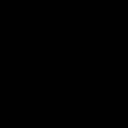

In [31]:
print("Neural netowrk output")

pred = model.predict(img_array)

print(pred)
print(img_array)


cols, rows = img.size
img_array2 = pred[0].reshape(rows,cols,3)
img_array2 = img_array2.astype(np.uint8)
img2 = Image.fromarray(img_array2, 'RGB')

img2


# **Problem 3**

In [14]:
import numpy as np

def entropy(p):
  return np.sum(-p * np.log(p))

def cross_entropy(p, q):
  return np.sum(-p * np.log(q))

def kl_divergence(p,q):
  return np.sum(-p * np.log(q/p))


**Initializing the pictures**

In [15]:
div_factor = 1/256

image_1 = np.array([35 * div_factor, 36 * div_factor, 45 * div_factor , 95 * div_factor, 24 * div_factor, 15 * div_factor, 6 * div_factor])

image_2 = np.array([20* div_factor, 56 * div_factor, 85 * div_factor, 52 * div_factor, 22 * div_factor, 20 * div_factor, 1 * div_factor])


**a)**

In [16]:
image_1_entropy = entropy(image_1)

image_2_entropy = entropy(image_2)

print("Entropy og image_1 = %1.4f" %image_1_entropy)
print("Entropy og image_2 = %1.4f" %image_2_entropy)

Entropy og image_1 = 1.6975
Entropy og image_2 = 1.6532


**b) and c)**

In [17]:
img1_wrt_img2 = cross_entropy(image_1, image_2)

img2_wrt_img1 = cross_entropy(image_2, image_1)

print("Entropy of image_1 = %1.4f" %img1_wrt_img2)
print("Entropy of image_2 = %1.4f" %img2_wrt_img1)



Entropy of image_1 = 1.8570
Entropy of image_2 = 1.8029


**d) and e)**

In [18]:
img1_kl_divergence_wrt_img2 = kl_divergence(image_1, image_2)
img2_kl_divergence_wrt_img1 = kl_divergence(image_2, image_1)

img1_kl_divergence_wrt_img2 = img1_wrt_img2 - image_1_entropy
img2_kl_divergence_wrt_img1 = img2_wrt_img1 - image_2_entropy

print("KL Diversion of image 1 distribution wrt image 2 distribution = %1.4f" %img1_kl_divergence_wrt_img2)
print("KL Diversion of image 2 distribution wrt image 1 distribution = %1.4f" %img2_kl_divergence_wrt_img1)


KL Diversion of image 1 distribution wrt image 2 distribution = 0.1595
KL Diversion of image 2 distribution wrt image 1 distribution = 0.1497
